# Stroop Task

## Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the *color of the ink* in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the *congruent words* condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red;">RED</span>, <span style="color:blue;">BLUE</span>. In the *incongruent words* condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:#6aa84f;">PURPLE</span>, <span style="color:#674ea7;">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### 1. What is our independent variable? What is our dependent variable?

Our independent variable is the test that participants take under two conditions: congruent and incongruent.

Our dependent variable is the time it takes for a participant to name the ink colors in equally-sized lists.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
By looking at the data provided in the sample dataset, it seems like participants taken from a population are taking longer to identify the names of colors when printed in a different color (incongruent words condition). From this observation, we can come up with the following hypotheses:

Let $\mu_{incongruent}$ be defined as the mean of the population that performs the task under the incongruent condition.

Let $\mu_{congruent}$ be defined as the mean of the population that perform the task under the congruent condition.

**Null Hypothesis**: There is no statistical difference in time measurement between the two population means. It will take the same time for an individuals from the population to perform each task.
$$H_0 :\ \mu_{incongruent} = \mu_{congruent}$$


**Alternative Hypothesis**: Individuals from the population will take longer to complete the task under the incongruent words condition than with the congruent words condition.
$$H_A: \mu_{incongruent} > \mu_{congruent}$$


A **One-tailed dependent t-test** in the positive direction is expected to be performed to see if any hypotheses need to be rejected. 
* A t-test is used because:
    * The sample size is below 30.
    * The population standard deviation is not known.
* A dependent t-test is used because the two samples are dependent; the same partipants take the two tests under different conditions. 
* Only one direction is tested because we want to see if it takes longer for partipants to perform the task under the incongruent words condition.

Based on the results of our t-test we can make a inference towards how conflicting cues play a role in how fast individuals from the human population can process information. In this particular case, we will find out how a name of a color being displayed with a different color affect how long it takes to be recited.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
import math
import pandas as pd
import scipy.stats as st
from IPython.display import Latex
from IPython.display import Math
from IPython.display import display

%matplotlib inline

In [2]:
path = r'./stroopdata.csv'

df_stroop = pd.read_csv(path)
df_stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [3]:
mu_congruent = round(df_stroop['Congruent'].mean(),4)
mu_incongruent = round(df_stroop['Incongruent'].mean(),4)

text = r"""
\begin{{align}}
    \mu_{{congruent}}={}\\
    \mu_{{incongruent}}={}
\end{{align}}""".format(mu_congruent, mu_incongruent)

Latex(text)

<IPython.core.display.Latex object>

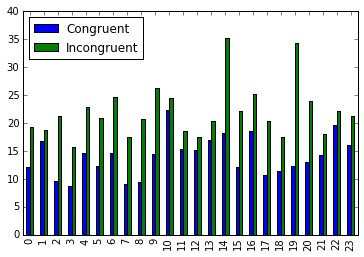

In [4]:
df_stroop.plot(kind="bar")


### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

#### Descriptive statistics for the difference between two conditions
Let $\mu_D$ be defined as the mean difference between the incongruent set and congruent set.

Let $\sigma_D$ be defined as the standard deviation of the differences between the incongruent and congruent set.

In [5]:
df_diff = df_stroop['Incongruent']-df_stroop['Congruent']
mu_D = round(df_diff.mean(),4)
std_D = round(df_diff.std(),4)

text = r"""
        \begin{{align}}
            \mu_D = {}\\
            \sigma_D = {}\\
        \end{{align}}""".format(mu_D,std_D)

display(Latex(text))

<IPython.core.display.Latex object>

#### Calculate the critical t value:

In [6]:
n = df_diff.count()
df = n-1
alpha = .05
t_critical = round(st.t.ppf(1-alpha,df),3)

text = r"""t_{{critical}}=t_{{{},{}}}={}""".format(alpha,df,t_critical)
display(Math(text))

<IPython.core.display.Math object>

#### Calculate the t value:

In [7]:
# Calculate t
SEM = round(std_D/math.sqrt(n),4)
t = round(mu_D/SEM,3)

text = r"""t = \frac{{\mu_D}}{{SEM}} = \
           \frac{{{}}}{{{}}} = {}""".format(mu_D,SEM,t)
display(Math(text))

<IPython.core.display.Math object>

#### Confidence Interval:

In [8]:
two_tailed_t_critical = round(st.t.ppf(alpha/2,df),3)
m_error = -1*round(two_tailed_t_critical * SEM,4)


text = r"""
        \begin{{align}}
            {} \pm {}\\
            [{},{}]\\
        \end{{align}}""".format(mu_D,m_error,mu_D-m_error,mu_D+m_error)

display(Latex(text))

<IPython.core.display.Latex object>

Our results show that t is within the critical region, meaning:
$t > t_{critical}$. The Stroop Effect is observed with these findings. Partipants are likely to take 6 to 10 seconds longer on average to finishing the incongruent word condition compared with the congruent words condition.

We reject the null hypothesis. Based on our statistical findings we can say that the participants take longer to finish the task under the incongruent words condition. The results match up my expectations.


### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

There is a part of our brain that deal with recalling information given a certain stimuli. There is another part of our brain that deals with processing new information. When the information supplied from both of these parts interfere with another, there is a time delay in regards to processing the correct information.

A real life scenario of this problem is learning a new language which uses the roman alphabet. If someone knows English, but tries to learn French, then initially that person will struggle to attach different sounds to the letters that already have a sound attached to it.

In [9]:
import IPython.display as disp
def css_styling():
    styles = open("../css/custom.css", "r").read()
    return disp.HTML(styles)
css_styling()